# CLOTHING IMAGE CLASSIFICATION - MODEL

Referred to (https://github.com/snova301/fashion_mnist) .

In [5]:
import time
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from keras.datasets import fashion_mnist
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import Callback, CSVLogger
from keras.utils import to_categorical, plot_model
from keras.models import model_from_json
import h5py

In [6]:
# Defining params

Batch_size = 128
Epochs = 20

Epoch 1/20
8/8 [==============================] - 1s 95ms/step - loss: 1.8713 - accuracy: 0.3630 - val_loss: 1.1786 - val_accuracy: 0.6430
Epoch 2/20
8/8 [==============================] - 1s 77ms/step - loss: 1.2190 - accuracy: 0.5880 - val_loss: 0.8428 - val_accuracy: 0.7260
Epoch 3/20
8/8 [==============================] - 1s 74ms/step - loss: 0.9028 - accuracy: 0.6940 - val_loss: 0.6580 - val_accuracy: 0.7730
Epoch 4/20
8/8 [==============================] - 1s 79ms/step - loss: 0.7672 - accuracy: 0.7540 - val_loss: 0.6121 - val_accuracy: 0.7690
Epoch 5/20
8/8 [==============================] - 1s 71ms/step - loss: 0.6796 - accuracy: 0.7590 - val_loss: 0.5756 - val_accuracy: 0.7920
Epoch 6/20
8/8 [==============================] - 1s 71ms/step - loss: 0.6324 - accuracy: 0.7760 - val_loss: 0.5623 - val_accuracy: 0.7990
Epoch 7/20
8/8 [==============================] - 1s 112ms/step - loss: 0.5686 - accuracy: 0.7990 - val_loss: 0.5235 - val_accuracy: 0.7990
Epoch 8/20
8/8 [==========

c:\Users\mkcor\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/20
8/8 [==============================] - 2s 98ms/step - loss: 1.8146 - accuracy: 0.4100 - val_loss: 1.0201 - val_accuracy: 0.7130
Epoch 2/20
8/8 [==============================] - 1s 71ms/step - loss: 0.9683 - accuracy: 0.6930 - val_loss: 0.6502 - val_accuracy: 0.7730
Epoch 3/20
8/8 [==============================] - 1s 77ms/step - loss: 0.7743 - accuracy: 0.7270 - val_loss: 0.5688 - val_accuracy: 0.7970
Epoch 4/20
8/8 [==============================] - 1s 80ms/step - loss: 0.6186 - accuracy: 0.7840 - val_loss: 0.5512 - val_accuracy: 0.8020
Epoch 5/20
8/8 [==============================] - 1s 74ms/step - loss: 0.5603 - accuracy: 0.8050 - val_loss: 0.4988 - val_accuracy: 0.8110
Epoch 6/20
8/8 [==============================] - 1s 76ms/step - loss: 0.5329 - accuracy: 0.8080 - val_loss: 0.4916 - val_accuracy: 0.8210
Epoch 7/20
8/8 [==============================] - 1s 99ms/step - loss: 0.4797 - accuracy: 0.8320 - val_loss: 0.4839 - val_accuracy: 0.8380
Epoch 8/20
8/8 [===========

c:\Users\mkcor\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


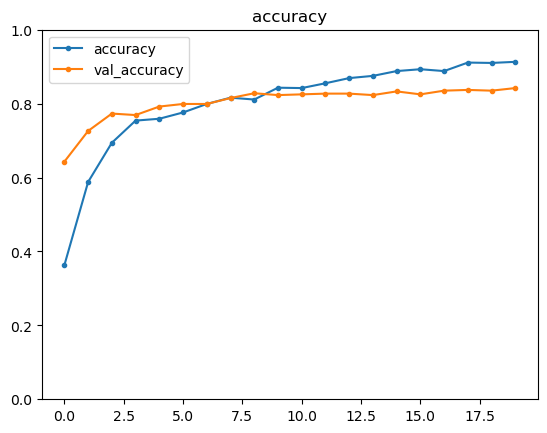

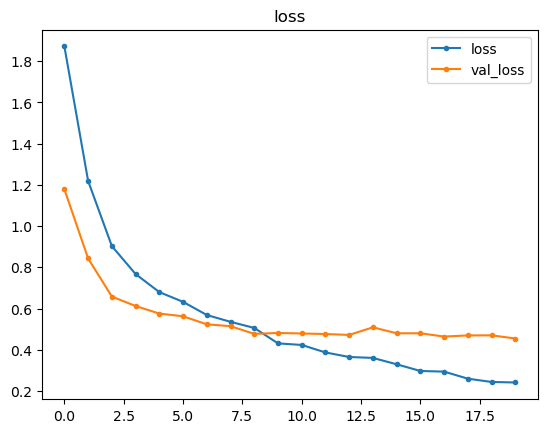

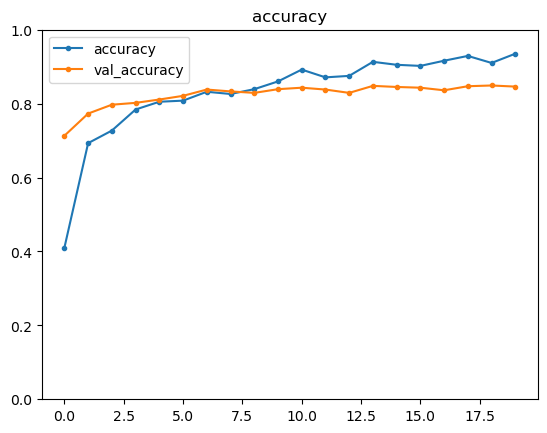

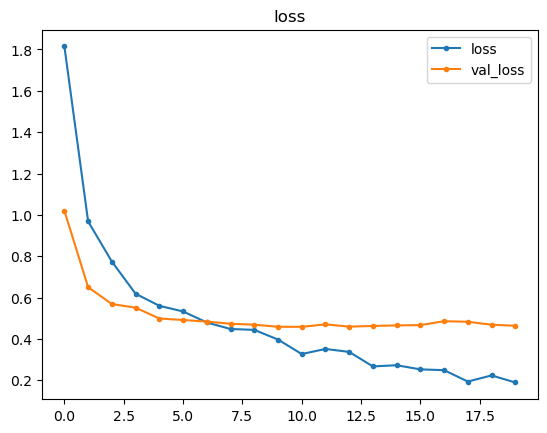

In [8]:
class FASHION_MNIST:
    def pre_proc(self, s_name):

        # Load train and test datasets using Pandas
        train = pd.read_csv('dataset/fashion-mnist_train.csv', encoding='utf-8')
        test = pd.read_csv('dataset/fashion-mnist_test.csv', encoding='utf-8')

        # Separate features (X) and labels (y) for train dataset
        x_train = train.drop('label', axis=1)  # Assuming the target column is named 'label' in train data
        y_train = train['label']

        # Separate features (X) and labels (y) for test dataset
        x_test = test.drop('label', axis=1)  # Assuming the target column is named 'label' in test data
        y_test = test['label']

        # Extracting data
        if s_name == '1st':
            list_n_data = [0, 1000, 0, 1000] 
        elif s_name == '2nd':
            list_n_data = [2000, 3000, 2000, 3000] 
        x_train = x_train[list_n_data[0]:list_n_data[1]]
        y_train = y_train[list_n_data[0]:list_n_data[1]]
        x_test = x_test[list_n_data[2]:list_n_data[3]]
        y_test = y_test[list_n_data[2]:list_n_data[3]]

        # Convert Pandas DataFrame columns to NumPy arrays for reshaping
        x_train = np.array(x_train)
        x_test = np.array(x_test)

        # Process 
        x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')/255
        x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/255
        y_train = to_categorical(y_train, 10) # one-hot
        y_test = to_categorical(y_test, 10)# one-hot

        return x_train, y_train, x_test, y_test

    
    def plot_result(self, history, s_name):
        # Accuracy
        plt.figure()
        plt.plot(history.history['accuracy'], label='accuracy', marker='.')
        plt.plot(history.history['val_accuracy'], label='val_accuracy', marker='.')
        plt.ylim(0, 1)
        plt.legend(loc='best')
        plt.title('accuracy')
        plt.savefig('graph_accuracy_'+s_name+'.png')

        # Loss
        plt.figure()
        plt.plot(history.history['loss'], label='loss', marker='.')
        plt.plot(history.history['val_loss'], label='val_loss', marker='.')
        plt.legend(loc='best')
        plt.title('loss')
        plt.savefig('graph_loss_'+s_name+'.png')


    def create_model(self):
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(Flatten())

        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(10, activation='softmax'))

        return model

    def create_finetuning_model(self):

        # Open the model file using h5py and specify the encoding
        with h5py.File('model_1st.hdf5', 'r') as f:
            # Load the model using Keras
            model = load_model(f, compile=False)
            model.pop()  # delete softmax


        # Add layers
        model_a = model.output
        model_a = Dense(128, activation='relu', name='model_a_dense1')(model_a)
        model_a = Dense(10, activation='softmax', name='model_a_dense2')(model_a)

        tuning_model = Model(inputs=model.input, outputs=model_a)

        return tuning_model


    def start_learning(self, model, x_train, y_train, x_test, y_test, s_name):
        model.compile(loss='categorical_crossentropy',
                    optimizer=Adam(),
                    metrics=['accuracy'])

        csv_logger = CSVLogger('trainlog_'+s_name+'.csv')
        history = model.fit(x_train, y_train,
                            batch_size=Batch_size, epochs=Epochs,
                            verbose=1,
                            validation_data=(x_test, y_test),
                            callbacks=[csv_logger])

        print(model.summary())
        self.plot_result(history, s_name)
        self.predict_model(model, x_train, y_train, x_test, y_test)
        model.save('model_'+s_name+'.hdf5')
        plot_model(model, to_file='model_'+s_name+'.png', show_shapes=True, show_layer_names=True, rankdir='TB')


    def predict_model(self, model, x_train, y_train, x_test, y_test):
        pred_train = model.predict(x_train, verbose=0)
        pred_test = model.predict(x_test, verbose=0)

        # Train data
        arg_pred_train = np.argmax(pred_train, axis=1)
        arg_y_train = np.argmax(y_train, axis=1)
        acc_train = np.sum(arg_pred_train - arg_y_train == 0)/pred_train.shape[0]
        print('train accuracy : ' + str(acc_train))

        # Test data
        arg_pred_test = np.argmax(pred_test, axis=1)
        arg_y_test = np.argmax(y_test, axis=1)
        acc_test = np.sum(arg_pred_test - arg_y_test == 0)/pred_test.shape[0]
        print('test accuracy : ' + str(acc_test))


    def main(self):
        # 1st learning
        x_train, y_train, x_test, y_test = self.pre_proc('1st')
        model = self.create_model()
        self.start_learning(model, x_train, y_train, x_test, y_test, '1st')

        # fine-tuning
        x_train, y_train, x_test, y_test = self.pre_proc('2nd')
        model = self.create_finetuning_model()
        self.start_learning(model, x_train, y_train, x_test, y_test, '2nd')


if __name__ == '__main__':
    FASHION_MNIST().main()